## Requirements

- pandas       data manipulation
- matplotlib   graphics 
- python-pptx  powerpoint design
- xlrd         reading xlsx files

should be installed to run this notebook, the whole configuration is set in requirements.txt for exact reproduction.

Before proceeding, load bellow libraries

## Loading Libraries

pandas version must be latter than 0.20.0

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.offsetbox import (TextArea, AnnotationBbox)
import pptx
from collections import OrderedDict

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual, VBox, HBox, Label
import ipywidgets as widgets

In [3]:
import pandas as pd
from IPython.display import display
from ipywidgets import interact, interact_manual, VBox, HBox, Label, widgets
from datetime import datetime

In [4]:
import qgrid

In [5]:
%load_ext sql

In [6]:
from prepare import prepare

In [7]:
from graphics import marimekkompt

In [8]:
from pptxgraphics import marimekkopptx

# Browse Database

In [19]:
database = "sqlite:///./power.db"

In [20]:
%sql $database

In [21]:
tables = %sql SELECT name FROM sqlite_master WHERE type='table';

 * sqlite:///./power.db
Done.


In [22]:
tables=tables.DataFrame()['name'].unique()

In [23]:
tables.sort()

In [24]:
@interact
def browse_tables_qgrid(table_name=tables):
    name =table_name
    def browse(frame,name):
        grid_options= {
            # SlickGrid options
            'fullWidthRows': True,
            'syncColumnCellResize': True,
            'forceFitColumns': False,
            'defaultColumnWidth': 150,
            'rowHeight': 28,
            'enableColumnReorder': True,
            'enableTextSelectionOnCells': True,
            'editable': True,
            'autoEdit': False,
            'explicitInitialization': True,

            # Qgrid options
            'maxVisibleRows': 15,
            'minVisibleRows': 8,
            'sortable': True,
            'filterable': True,
            'highlightSelectedCell': False,
            'highlightSelectedRow': True
        }
        display(qgrid.show_grid(frame, grid_options=grid_options, show_toolbar=False))
    
    frame = %sql SELECT * FROM [{name}]
    interact(browse,frame=fixed(frame.DataFrame()),name=fixed(name))

interactive(children=(Dropdown(description='table_name', options=('power',), value='power'), Output()), _dom_c…

# Read excel and Save data to database

- This section must be done each time a new version of the excel file is downloaded

In [12]:
%sql DROP TABLE power

 * sqlite:///./power.db
(sqlite3.OperationalError) no such table: power
[SQL: DROP TABLE power]
(Background on this error at: http://sqlalche.me/e/e3q8)


## Read the product list
- fill NaN as empty string

In [13]:
arcfile = open('IEA Electricity by Sources 2017.xlsx', 'rb')

In [14]:
power = pd.read_excel(arcfile,sheet_name='Table').filter(['TWh 2017 EIA','Attribut','Valeur'])

In [15]:
power.fillna('', inplace=True)

In [16]:
power.rename(columns={'Valeur':'Share'}, inplace=True)

In [17]:
power.head()

,TWh 2017 EIA,Attribut,Share
0,Australia,Coal,162
1,Brazil,Renewables,466
2,Canada,Renewables,432
3,Canada,Nuclear,101
4,China,Coal,4485


In [18]:
%sql --persist power

 * sqlite:///./power.db


'Persisted power'

# Draw Marimekko from List

In [58]:
powersql = %sql SELECT * FROM power

 * sqlite:///./power.db
Done.


In [59]:
power = powersql.DataFrame().filter(['TWh 2017 EIA','Attribut','Share'])

In [61]:
power.head()

,TWh 2017 EIA,Attribut,Share
0,Australia,Coal,162
1,Brazil,Renewables,466
2,Canada,Renewables,432
3,Canada,Nuclear,101
4,China,Coal,4485


In [25]:
blob={"dfu":None,"product":"DeepDive","markets":None,"marketsize":None,"smarkets":None,"pMarkets":None,"cp":None,"cpp":None,"ppc":None}

In [26]:
blob["dfu"]=power
blob["market"] = 'TWh 2017 EIA'
blob["product"]="Attribut"
prepare(blob)

25,493


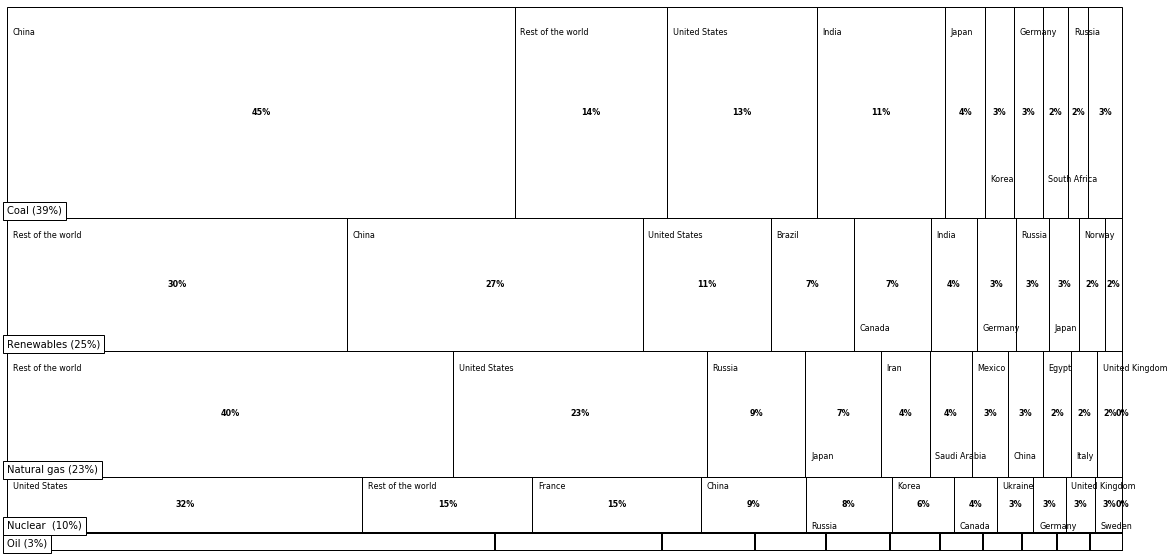

In [27]:
height = 10
width = 20
lowshare = 0.017
drawshare = 0.1
marketshare=0.05
showther=False
marimekkompt(blob["pMarkets"],blob["ppc"],lowshare,drawshare,marketshare,height,width,showther,blob["marketsize"])

In [28]:
height = 12.0
width = 20.0
lowshare = 0.017
drawshare = 0.1
marketshare=0.05
showther=False
prs = marimekkopptx(blob["pMarkets"],blob["ppc"],lowshare,drawshare,marketshare,height,width,showther,blob["marketsize"],'China')
prs.save("power.pptx")